In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('C:/Users/Garima Singh/Desktop/mooc data analysis/Simmons.xls')
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [3]:
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [4]:
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [6]:
#buliding log reg model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
x=data[['Card','Spending']] #independent
y=data['Coupon'].values.reshape(-1,1) #dependent

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [13]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [15]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [18]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [20]:
#log reg eqn
x=data[['Card','Spending']]
y=data['Coupon']
import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


C:\Users\Garima Singh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                  0.1012
Time:                        18:42:38   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""

In [21]:
#accuracy check
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.76

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [25]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print("True negatives:",tn)
print("false positives:",fp)
print("false negatives:",fn)
print("True positives:",tp)

True negatives: 15
false positives: 1
false negatives: 5
True positives: 4


In [27]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [33]:
#accuracy prediction
acc=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy(:0.2f)".format(Accuracy))

Accuracy(:0.2f)


In [35]:
#roc curve for training dataset
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'regend'

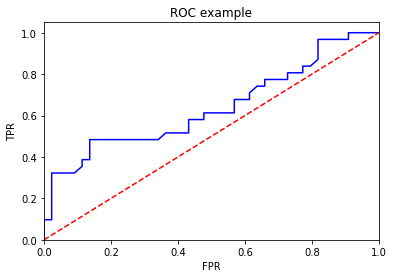

In [39]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC Curve(area=%0.2f)'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC example')
plt.regend(loc="lower right")
plt.show()

In [40]:
#accuracy check for different threshold values
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob.reshape(1,-1),0.35)
y_predict_class1

array([[1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 0.]])

In [41]:
#accuracy check for different threshold values
from sklearn.preprocessing import binarize
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0]])

In [43]:
confusion_matrix_2=confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix_2)

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [45]:
#gen classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

In [46]:
#cal optimal threshold values
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
print("area under roc curve: %f"%roc_auc)

area under roc curve: 0.902778


In [49]:
import numpy as np
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index:i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

SyntaxError: invalid syntax (<ipython-input-49-1f85ef18952e>, line 3)

NameError: name 'roc' is not defined

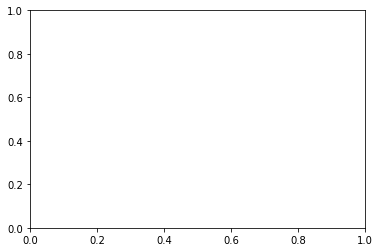

In [51]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-false pos rate')
plt.ylabel('tpr')
plt.title('roc')
ax.set_xticklabels([])

In [54]:
tbl1=pd.read_excel('C:/Users/Garima Singh/Desktop/mooc data analysis/Reynolds.xlsx')
tbl1

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'months employed')

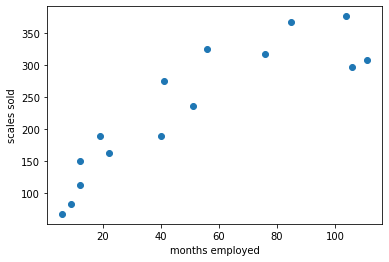

In [55]:
plt.scatter(tbl1['MonthsEmployed'],tbl1['ScalesSold'])
plt.ylabel('scales sold')
plt.xlabel('months employed')

In [56]:
x=tbl1['MonthsEmployed']
y=tbl1['ScalesSold']
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
Model=model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.24e-05
Time:                        20:59:29   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

C:\Users\Garima Singh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Garima Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [57]:
E=Model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [58]:
yhat=Model.predict(x2)
yhat


0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

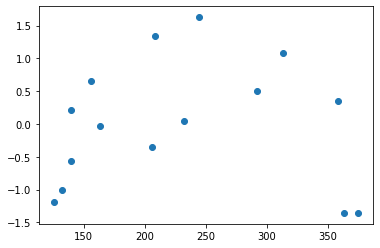

In [59]:
plt.scatter(yhat,E)

In [60]:
xsq=x**2
xsq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [71]:
import numpy as np
xnew=np.column_stack((x,xsq))
xnew2=sm.add_constant(xnew)
model2=sm.OLS(y,xnew2)
Model2=model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           8.75e-07
Time:                        21:08:01   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

In [72]:
e2=Model2.resid_pearson
e2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

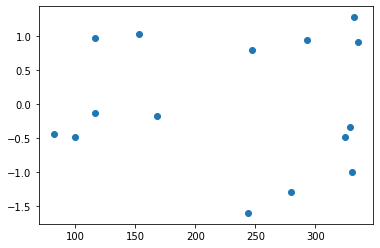

In [74]:
yhat2=Model2.predict(xnew2)
plt.scatter(yhat2,e2)

In [75]:
tbl1=pd.read_excel('C:/Users/Garima Singh/Desktop/mooc data analysis/Tyler.xlsx')
tbl1

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


In [76]:

tbl1.head()

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


Text(0.5, 0, 'x2')

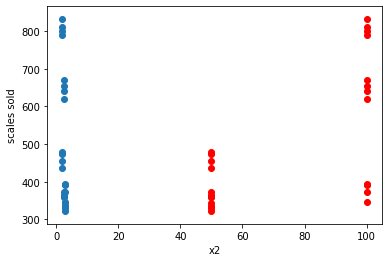

In [77]:
plt.scatter(tbl1['Price'],tbl1['Sales(1000s)'])
plt.ylabel('scales sold')
plt.xlabel('x1')
plt.scatter(tbl1['AdvertisingExpenditure($1000s)'],tbl1['Sales(1000s)'],color='red')
plt.ylabel('scales sold')
plt.xlabel('x2')

In [78]:
z1=tbl1['AdvertisingExpenditure($1000s)']
z2=tbl1['Price']
z3=z1*z2

In [80]:
import numpy as np
xnew=np.column_stack((z1,z2,z3))
y=tbl1['Sales(1000s)']
xnew2=sm.add_constant(xnew)
model2=sm.OLS(y,xnew2)
Model2=model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           9.26e-17
Time:                        21:12:38   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

In [84]:
#log transformation
p=np.log(y)
model3=sm.OLS(p,x2)
Model2=model3.fit()
print(Model2.summary())

ValueError: The indices for endog and exog are not aligned

In [85]:
e2=Model2.resid_pearson
yhat=Model2.predict(x2)
plt.scatter(yhat,e2)

ValueError: shapes (15,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)